In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [14]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

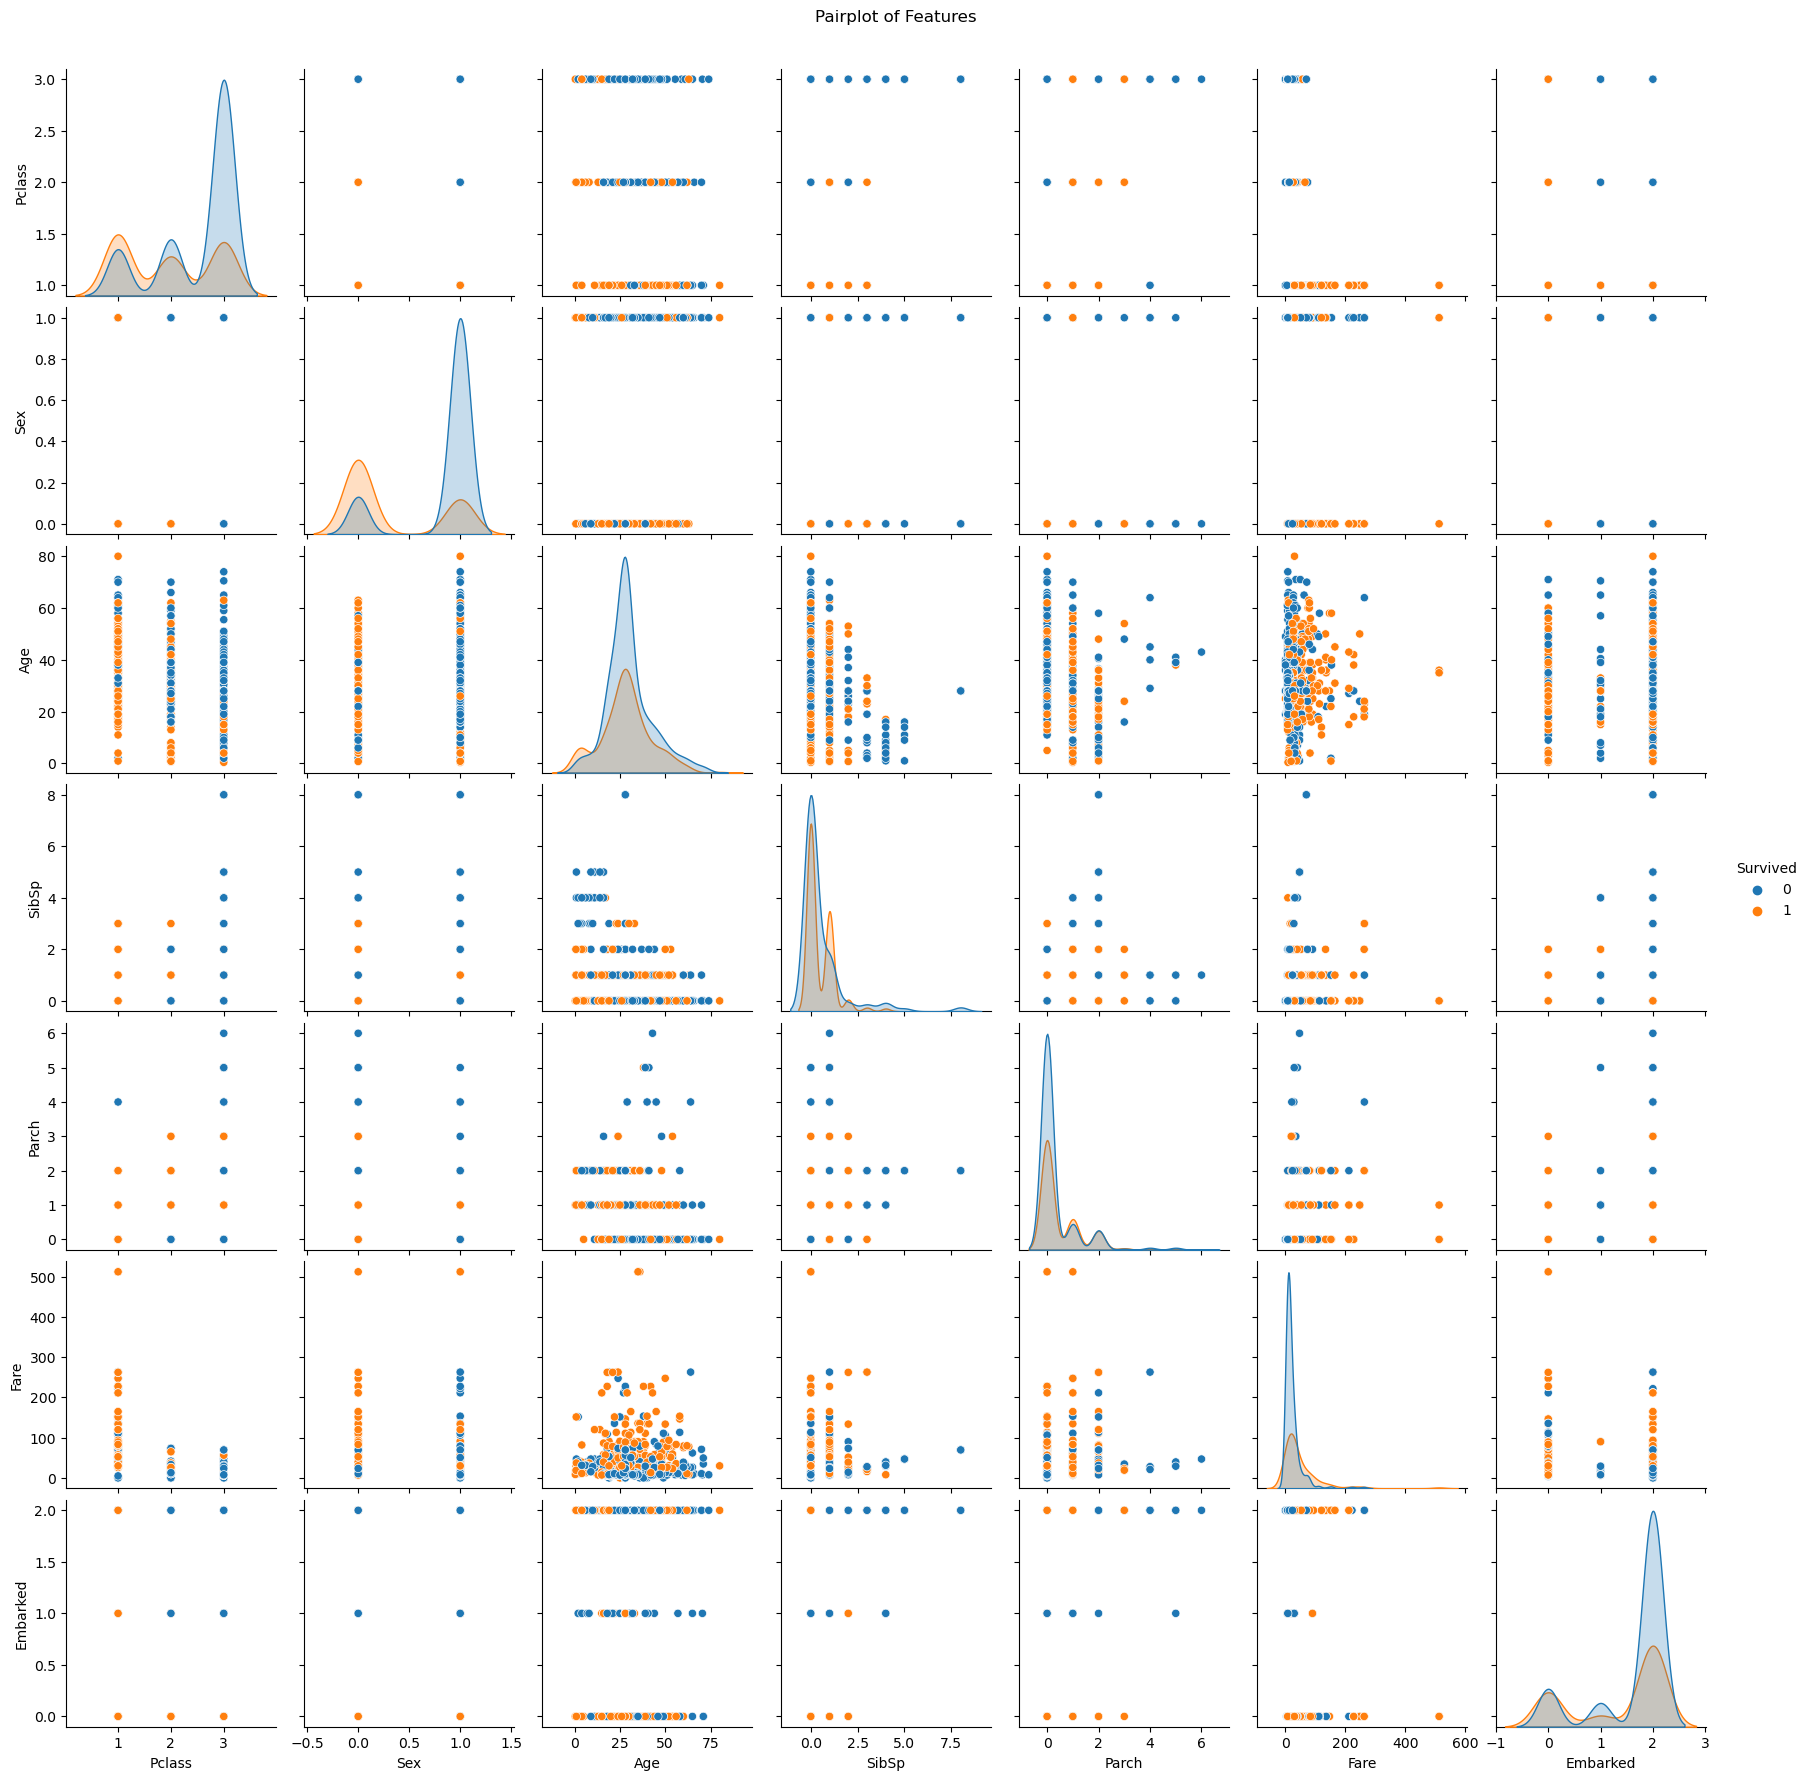

In [16]:
sns.pairplot(df, hue = 'Survived')
plt.suptitle('Pairplot of Features', y = 1.02)
plt.show()

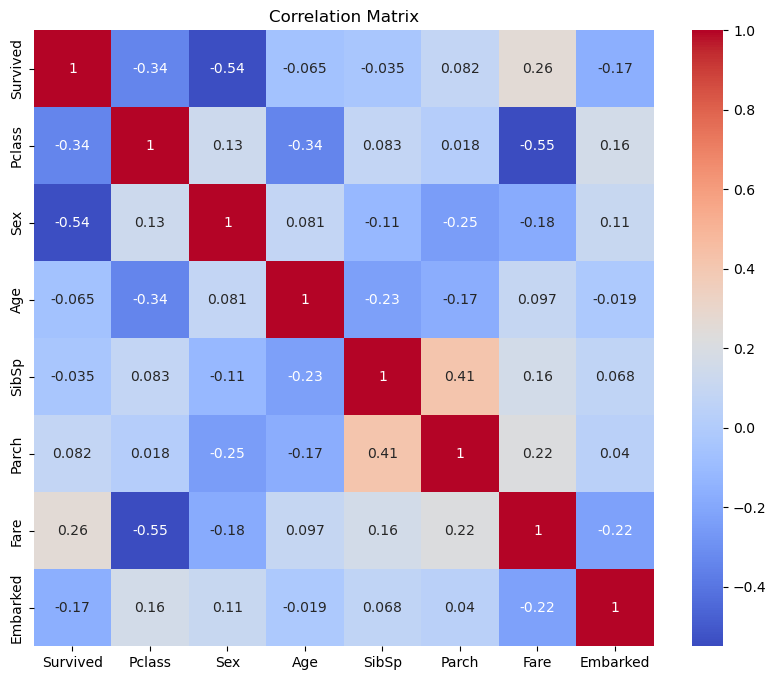

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

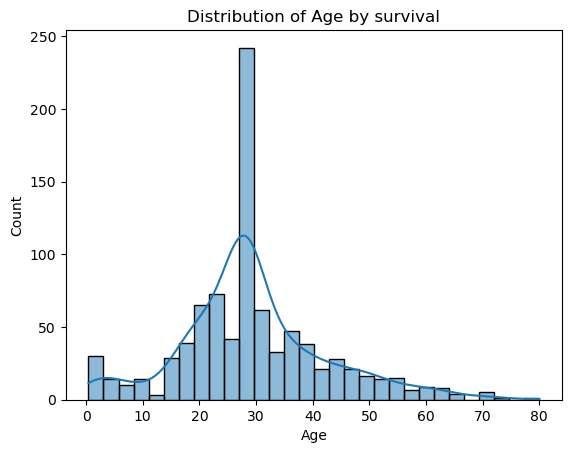

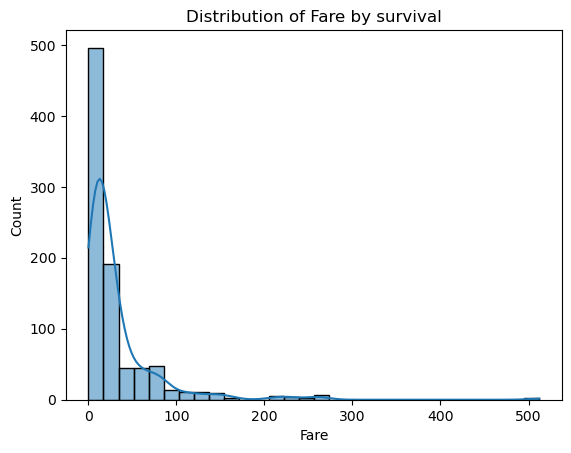

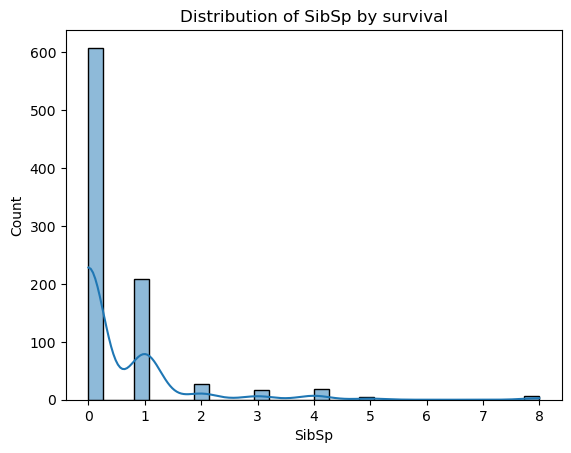

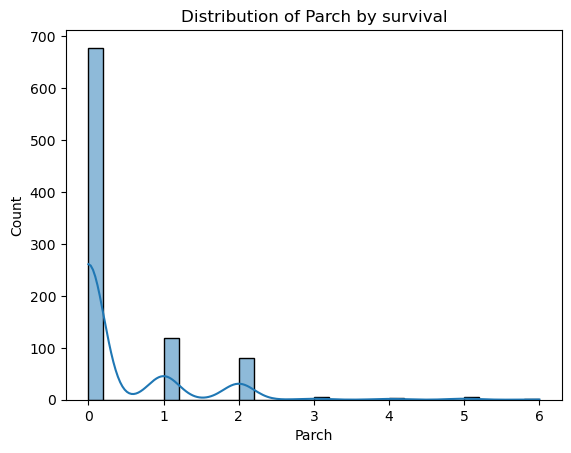

In [18]:
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} by survival")
    plt.show()

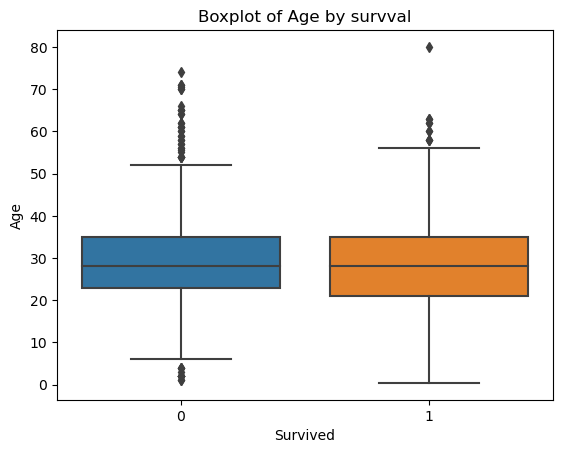

In [19]:
sns.boxplot(x='Survived', y = 'Age', data=df)
plt.title('Boxplot of Age by survval')
plt.show()

In [20]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [21]:
print('Explained Variance Ratio: ',pca.explained_variance_ratio_)
print('Original Shape: ', x_scaled.shape)
print("Redced Shape: ", x_pca.shape)

Explained Variance Ratio:  [0.26512593 0.24494388]
Original Shape:  (891, 7)
Redced Shape:  (891, 2)


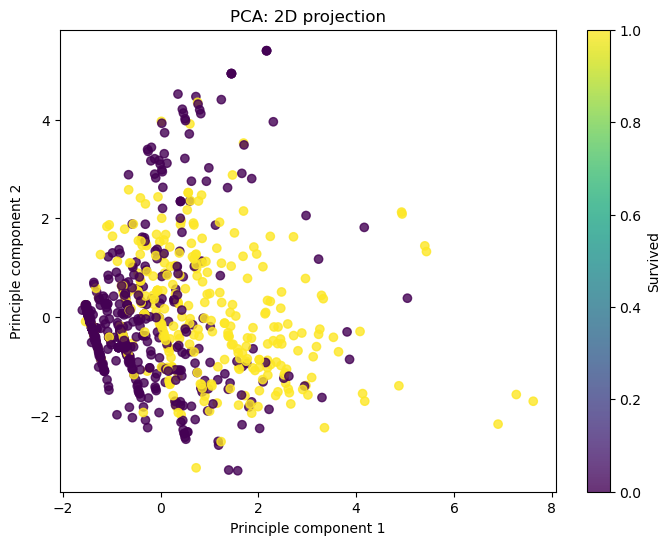

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(label='Survived')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('PCA: 2D projection')
plt.show()

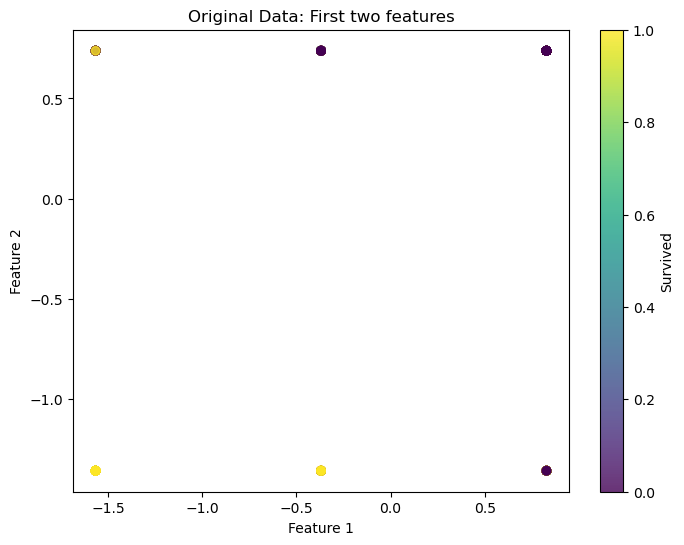

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(label='Survived')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data: First two features')
plt.show()

In [24]:
print("Before PCA:\n", x_scaled[:5])
print('After PCA:\n', x_pca[:5])

Before PCA:
 [[ 0.82737724  0.73769513 -0.56573646  0.43279337 -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103  0.43279337 -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 -0.4745452  -0.47367361 -0.48885426
   0.58595414]
 [-1.56610693 -1.35557354  0.4333115   0.43279337 -0.47367361  0.42073024
   0.58595414]
 [ 0.82737724  0.73769513  0.4333115  -0.4745452  -0.47367361 -0.48633742
   0.58595414]]
After PCA:
 [[-1.30639006  0.50772049]
 [ 2.3691106  -0.91292681]
 [-0.70501784  0.3261736 ]
 [ 1.40170678 -0.39444756]
 [-1.32243411 -0.48352779]]


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = clf.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7430167597765364